<a href="https://colab.research.google.com/github/Ravindra1972/Anaytics-in-finance-using-Python/blob/main/Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#2.1 Converting prices to returns

In [10]:
#Import the libraries
import pandas as pd
import numpy as np
import yfinance as yf

In [3]:
#Download the data and keep the adjusted close prices only

In [11]:
df = yf.download("AAPL",
                 start="2010-01-01",
                 end="2023-12-10",
                 progress=False)

df = df.loc[:, ["Adj Close"]]

In [12]:
df["simple_rtn"] = df["Adj Close"].pct_change()
df["log_rtn"] = np.log(df["Adj Close"]/df["Adj Close"].shift(1))

In [6]:
#Inspect the output

In [13]:
import yfinance as yf

df = yf.download("AAPL",
                 start="2010-01-01",
                 end="2020-12-31",
                 progress=False)

df = df.loc[:, ["Adj Close"]]

In [14]:
#Resample daily prices to monthly
df = df.resample("M").last()
df

,Adj Close
Date,
2010-01-31,5.814476
2010-02-28,6.194724
2010-03-31,7.114456
2010-04-30,7.904309
2010-05-31,7.776855
...,...
2020-08-31,126.582199
2020-09-30,113.604172
2020-10-31,106.786552


In [7]:
#2.2 Changing the frequency of time series data

In [16]:
import pandas as pd
import yfinance as yf
import numpy as np

# download data
df = yf.download("AAPL",
                 start="2000-01-01",
                 end="2010-12-31",
                 auto_adjust=False,
                 progress=False)

# keep only the adjusted close price
df = df.loc[:, ["Adj Close"]] \
       .rename(columns={"Adj Close": "adj_close"})

# calculate simple returns
df["log_rtn"] = np.log(df["adj_close"]/df["adj_close"].shift(1))

# remove redundant data
df = df.drop("adj_close", axis=1) \
       .dropna(axis=0)

df.head()

,log_rtn
Date,
2000-01-04,-0.088077
2000-01-05,0.014527
2000-01-06,-0.090514
2000-01-07,0.046281
2000-01-10,-0.017744


In [17]:
#Import the libraries

In [18]:
import pandas as pd
import numpy as np

In [ ]:
#Define the function for calculating the realized volatility

In [19]:
def realized_volatility(x):
    return np.sqrt(np.sum(x**2))

In [ ]:
#Calculate monthly realized volatility

In [20]:
df_rv = (
    df.groupby(pd.Grouper(freq="M"))
    .apply(realized_volatility)
    .rename(columns={"log_rtn": "rv"})
)

In [ ]:
#Annualize the values

In [21]:
df_rv.rv = df_rv["rv"] * np.sqrt(12)

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

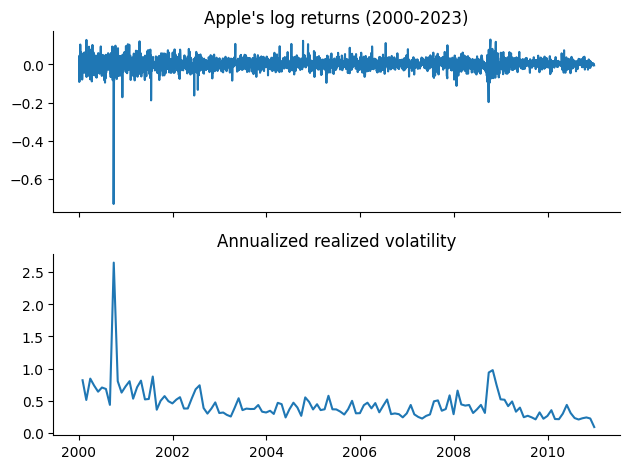

In [23]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(df)
ax[0].set_title("Apple's log returns (2000-2023)")
ax[1].plot(df_rv)
ax[1].set_title("Annualized realized volatility")

sns.despine()
plt.tight_layout()
# plt.savefig('images/figure_2_5', dpi=200)

In [ ]:
#Converting currencies

In [ ]:
#Import the libraries

In [105]:
pip install forex_python.converter
pip install CurrencyRates

SyntaxError: ignored

In [1]:
#Download Apple's OHLC prices from January 2020
df = yf.download("AAPL",
                 start="2020-01-01",
                 end="2023-11-30",
                 progress=False)
df = df.drop(columns=["Adj Close", "Volume"])

NameError: ignored

In [117]:
import pandas as pd
import yfinance as yf
from forex_python.converter import CurrencyRates

ModuleNotFoundError: ignored

In [118]:
c = CurrencyRates()

NameError: ignored

In [116]:
df["usd_eur"] = [c.get_rate("USD", "EUR", date) for date in df.index]

NameError: ignored

In [109]:
for column in df.columns[:-1]:
 df[f"{column}EUR"] = df[column] * df["usd_eur"]
 df.head().round(3)

KeyError: ignored